## 1. Background

A UK-based company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. The company wants to find the purchase intent for every online session. The online retail data set contains all the sessions occurring between 01/12/2009 and 09/12/2011. The aim of our project is to study the details of every online session, identify the customer behavior and predict purchase intent. 

Source : https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

## 2. Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file C:\Users\Bangaru\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Bangaru\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Bangaru\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlib

In [2]:
# Reading the CSV file 
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Checking the shape of the dataset
print(df.shape)

(12330, 18)


In [5]:
# Checking columns in dataset, corresponding data types and count of non null records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## 3. Data cleaning

In [6]:
# Finding the nulls percentage in each column 
df.isnull().sum()*100/len(df)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

No missing values in the input dataset. Hence, we don't need to impute anything

In [7]:
# We can observe that there a few categorical variables which are being considered as int/float type in the dataset:
cat_cols = ['Month','OperatingSystems','Browser','Region','TrafficType',
           'VisitorType','Weekend','Revenue']
num_cols = ['Administrative','Informational','ProductRelated','Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates',
           'ExitRates','PageValues','SpecialDay']

# Converting the categorical columns to type string explicitly
for i in cat_cols:
    df[i] = df[i].astype('str')

In [8]:
# Checking the transformed data types of columns
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                     object
dtype: object

In [9]:
# Relacing the True with 1 and False with 0 
df['Revenue'] = df['Revenue'].replace(['True','False'],['1','0'])

In [12]:
#Creating a list of categorical and numerical variables 
cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='float64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)[:-1] #excluding target variable

## 4. EDA

In [13]:
# Proportion of Revenue generating customers
print('Percentage of values in each target category:')

print(df['Revenue'].value_counts()/df.shape[0]*100)

Percentage of values in each target category:
0    84.525547
1    15.474453
Name: Revenue, dtype: float64


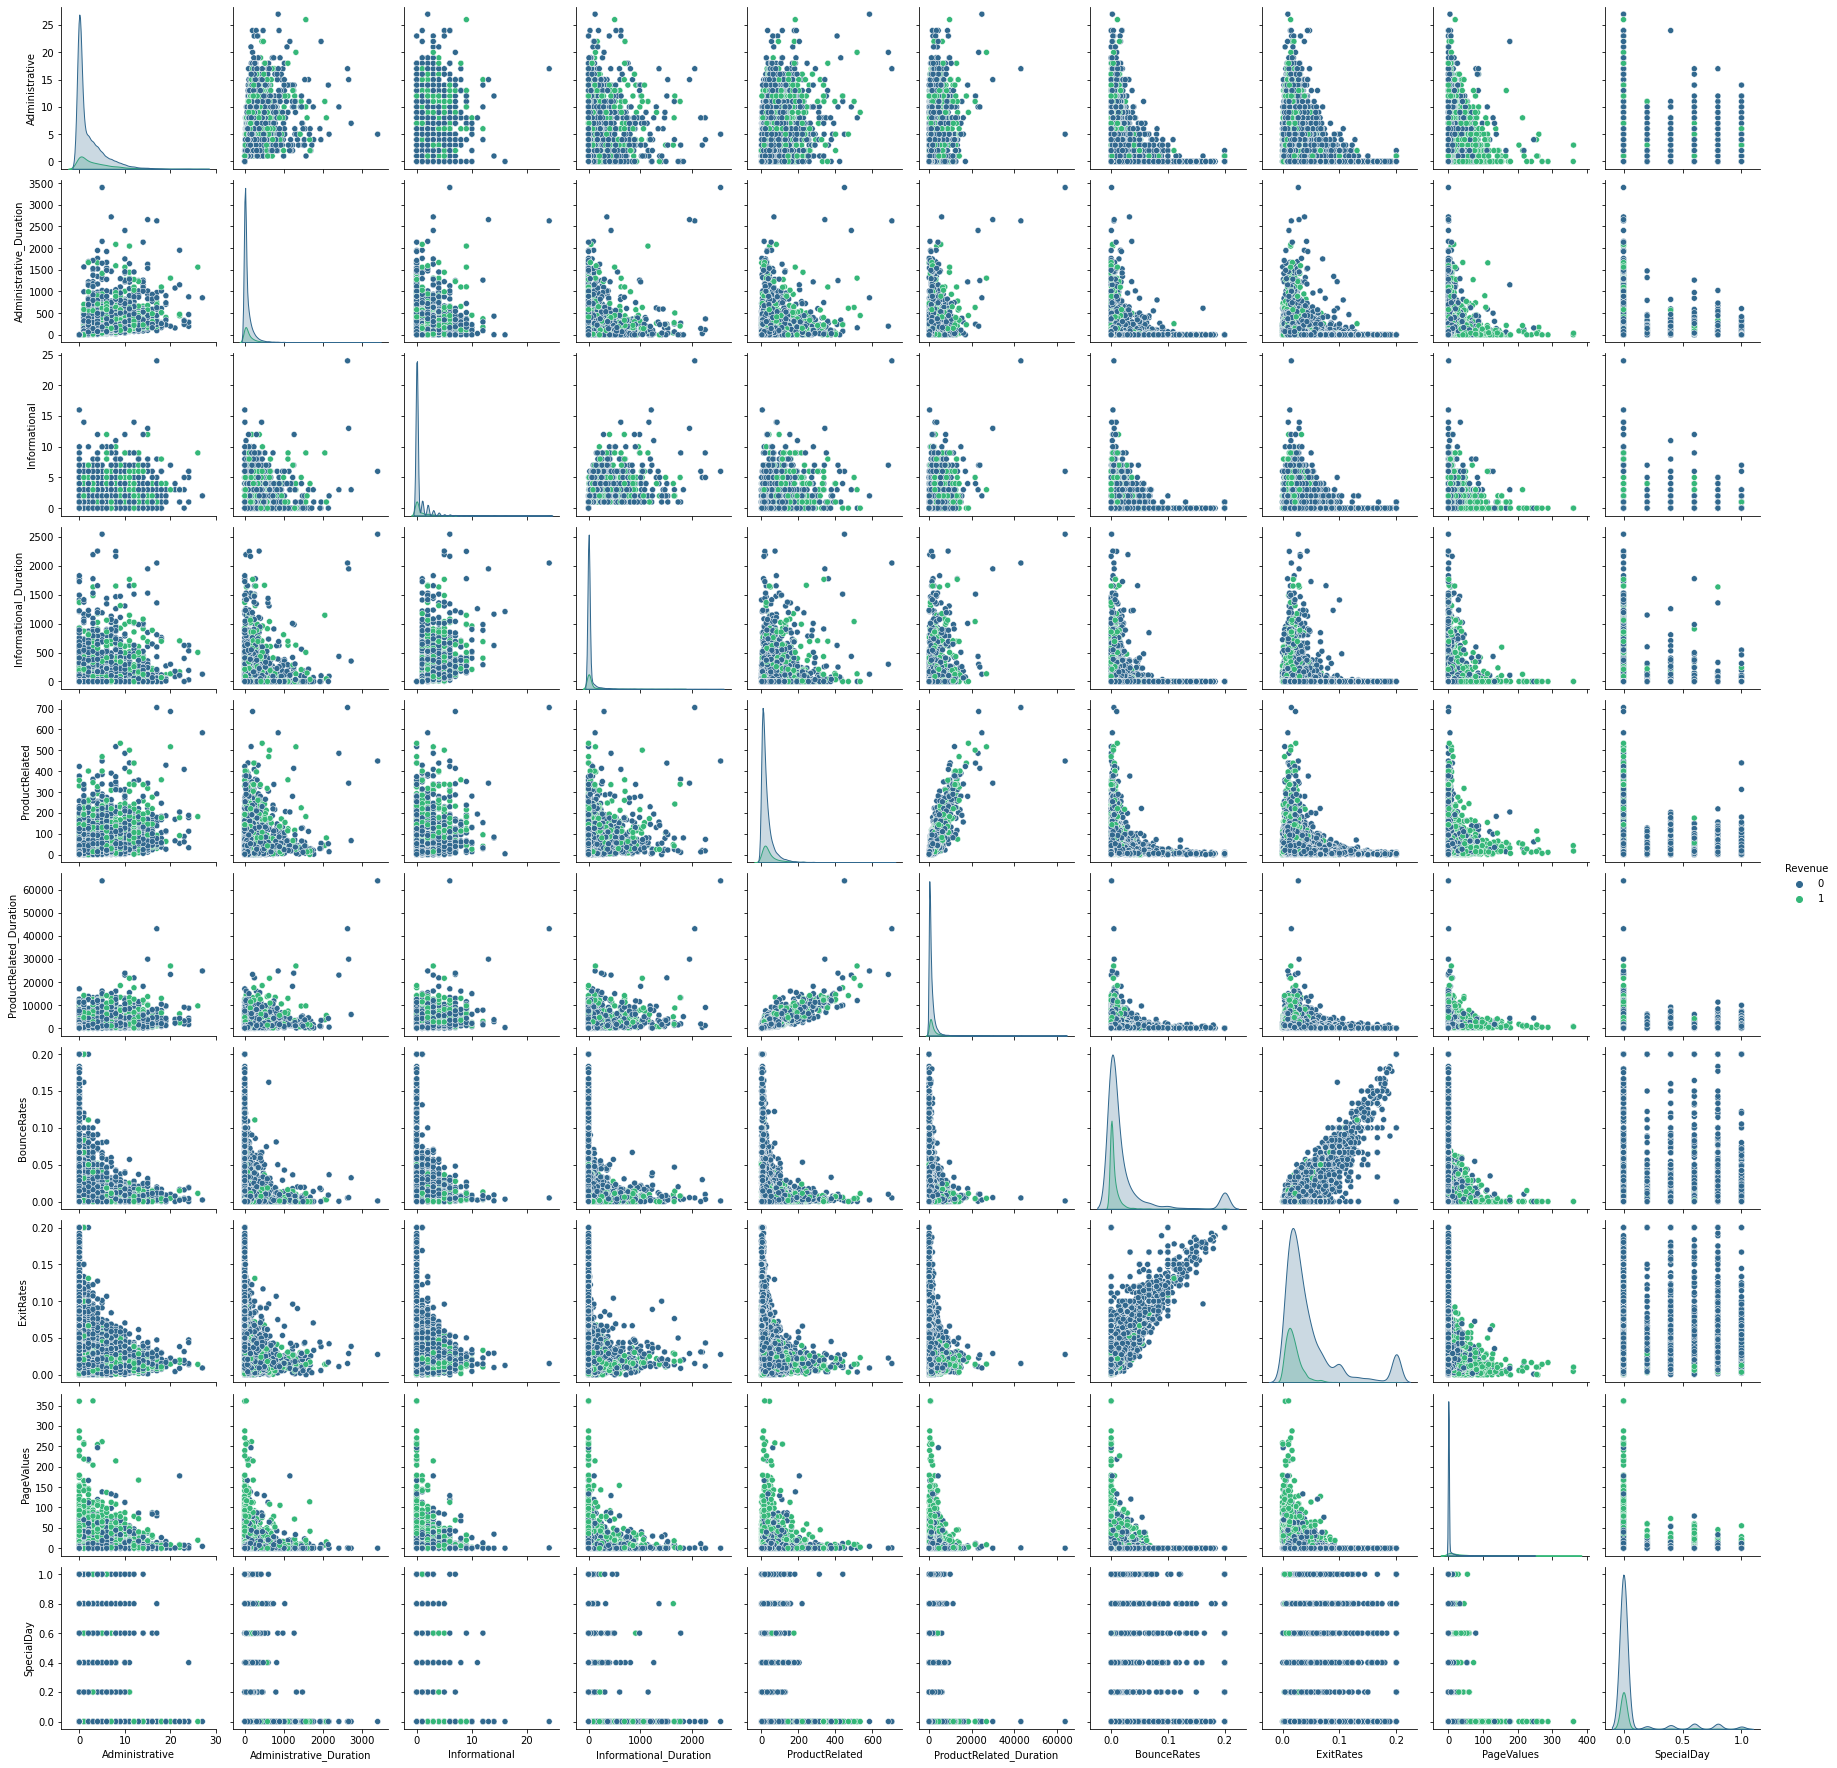

In [15]:
#Creating a pairplot to broadly visualise the 
sns.pairplot(df.drop(cat_cols,axis=1),palette='viridis',hue='Revenue');

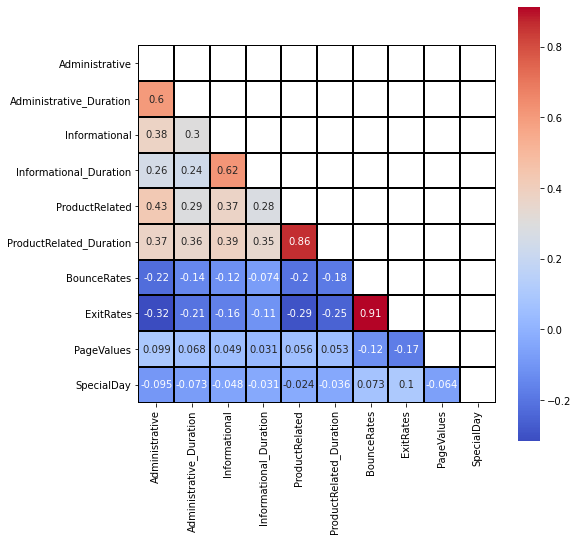

In [16]:
#Creating a heatmap to visualise correlation between all numeric variables of the dataset
plt.figure(figsize=(8,8))
correlation = df.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation,cmap='coolwarm',square=True,linecolor='black',linewidths=1,
            mask=matrix,annot=True)
plt.show()

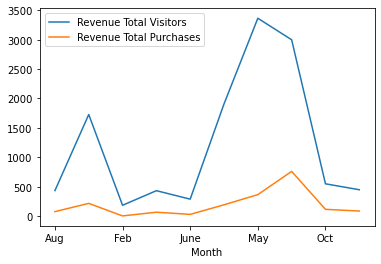

In [17]:
dfbool = df.copy()
dfbool['Revenue']= dfbool['Revenue'].astype('int')
df_group = dfbool.groupby(['Month'])
df2=pd.DataFrame(df_group['Revenue'].count(),columns=['Revenue'])
df2.reset_index(inplace=True)
df3=pd.DataFrame(df_group['Revenue'].sum(),columns=['Revenue'])
df3.reset_index(inplace=True)
# Merging the count and sum of Revenue
df_merge = df2.merge(df3,how='inner',on='Month',suffixes=[' Total Visitors',' Total Purchases'])
df_merge.plot.line(x = 'Month', y=['Revenue Total Visitors','Revenue Total Purchases'])
plt.show()

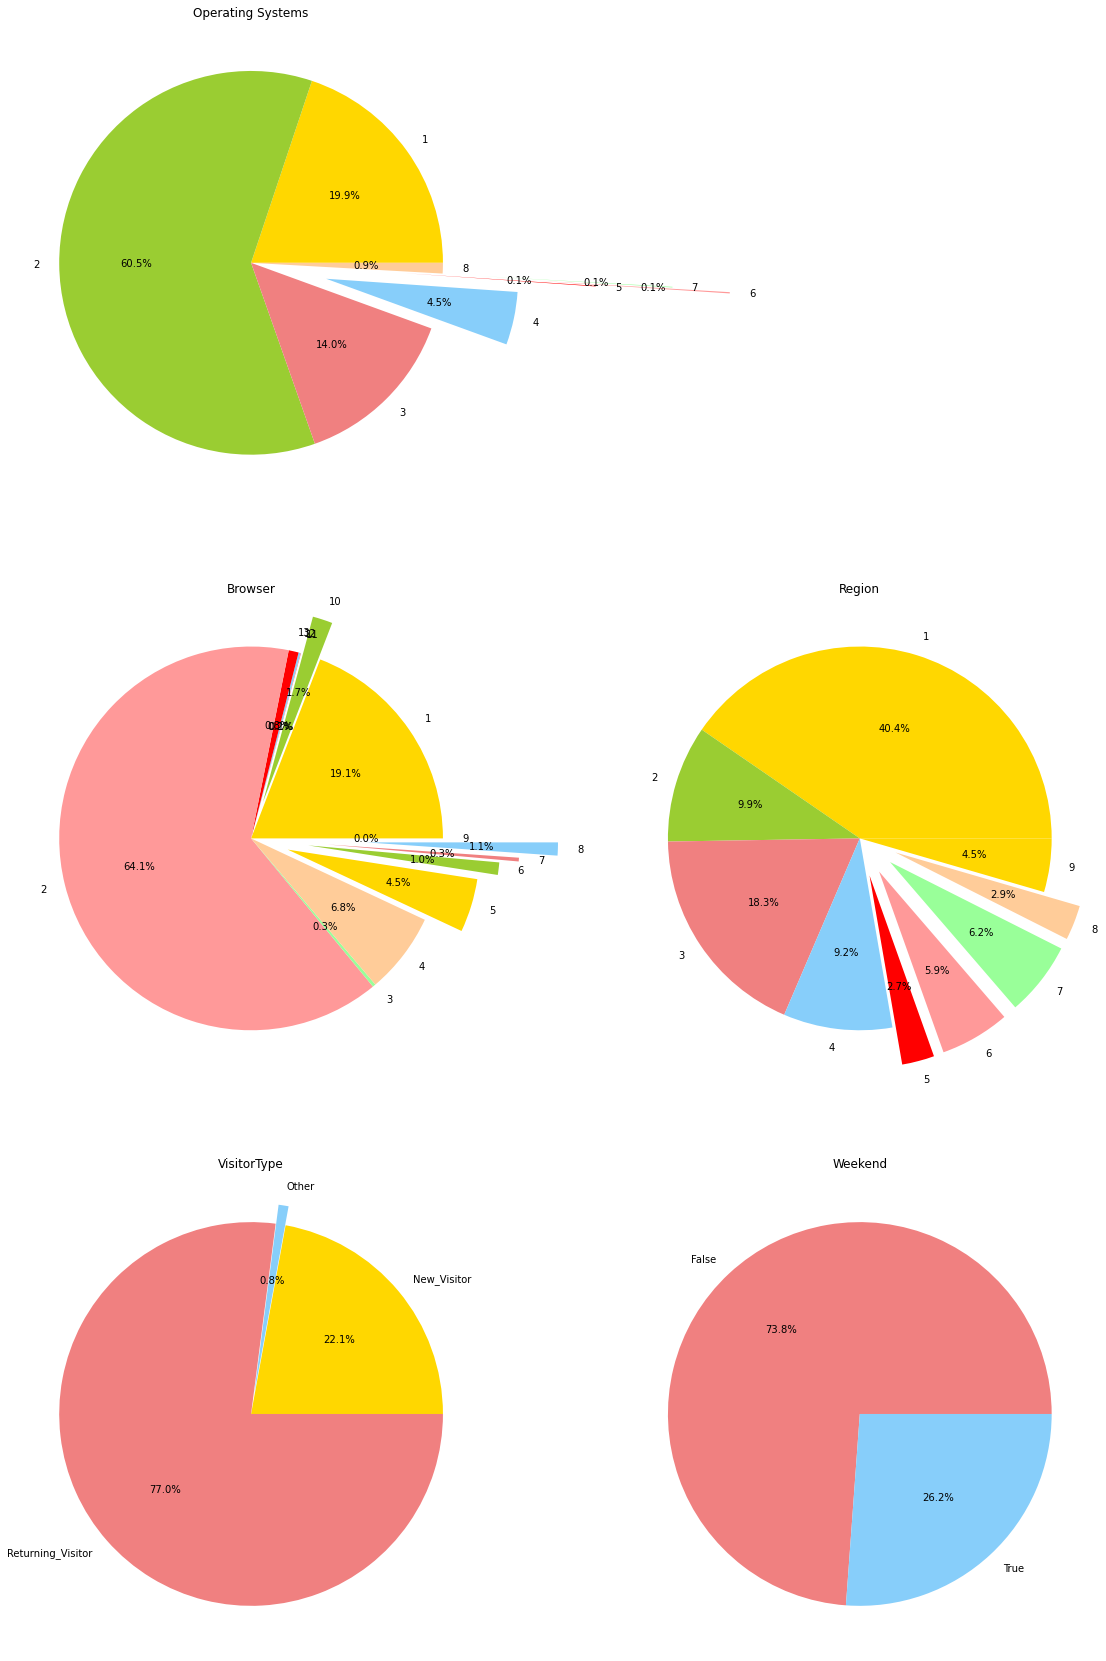

In [18]:
# Checking Revenue share based on different categorical variables

plt.rcParams['figure.figsize'] = [20, 30]
fig = plt.figure()

plt.subplot(3, 2, 1)
df_pie1 = dfbool.groupby('OperatingSystems').agg('sum')
colors= ['gold','yellowgreen','lightcoral','lightskyblue','r','#ff9999','#99ff99','#ffcc99']
plt.title('Operating Systems')
plt.pie(df_pie1['Revenue'], labels=df_pie1.index, explode = (0,0,0,0.4,0.8,1.5,1.2,0), autopct='%1.1f%%',colors=colors)

plt.subplot(3, 2, 3)
df_pie1 = dfbool.groupby('Browser').agg('sum')
colors= ['gold','yellowgreen','lightcoral','lightskyblue','r','#ff9999','#99ff99','#ffcc99']
plt.title('Browser')
plt.pie(df_pie1['Revenue'], labels=df_pie1.index, explode = (0,0.2,0,0,0,0,0,0,0.2,0.3,0.4,0.6,0), autopct='%1.1f%%',colors=colors)

plt.subplot(3, 2, 4)
df_pie1 = dfbool.groupby('Region').agg('sum')
colors= ['gold','yellowgreen','lightcoral','lightskyblue','r','#ff9999','#99ff99','#ffcc99']
plt.title('Region')
plt.pie(df_pie1['Revenue'], labels=df_pie1.index, explode = (0,0,0,0,0.2,0.2,0.2,0.2,0), autopct='%1.1f%%',colors=colors)

plt.subplot(3, 2, 5)
df_pie1 = dfbool.groupby('VisitorType').agg('sum')
colors= ['gold','lightskyblue','lightcoral']
plt.title('VisitorType')
plt.pie(df_pie1['Revenue'], labels=df_pie1.index, explode = (0,0.1,0), autopct='%1.1f%%',colors=colors)

plt.subplot(3, 2, 6)
df_pie1 = dfbool.groupby('Weekend').agg('sum')
colors= ['lightcoral','lightskyblue']
plt.title('Weekend')
plt.pie(df_pie1['Revenue'], labels=df_pie1.index, explode = (0,0), autopct='%1.1f%%',colors=colors)

plt.show()

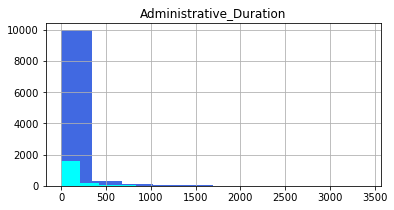

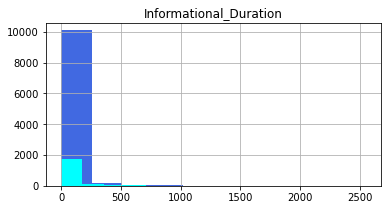

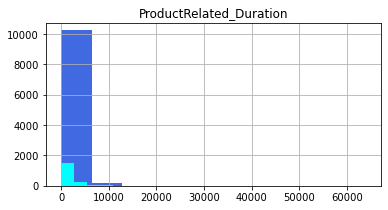

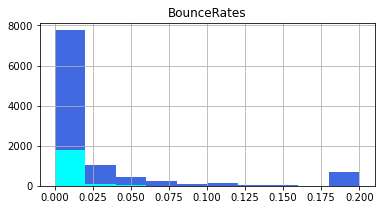

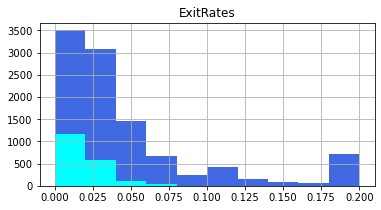

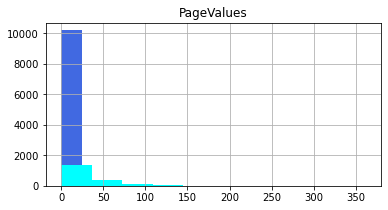

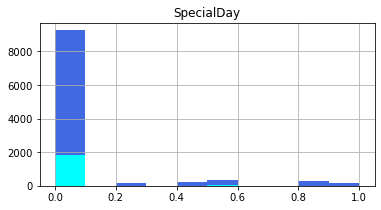

In [19]:
#Plotting histogram of the numerical variables by revenue and no revenue categories
for i in num_cols:
    plt.figure(figsize=(6,3))
    df[df['Revenue']=='0'][i].hist(color='royalblue')
    df[df['Revenue']=='1'][i].hist(color='cyan')
    plt.title(i)
    plt.show()

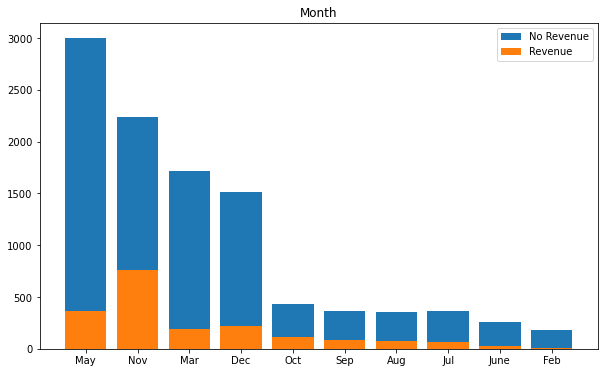

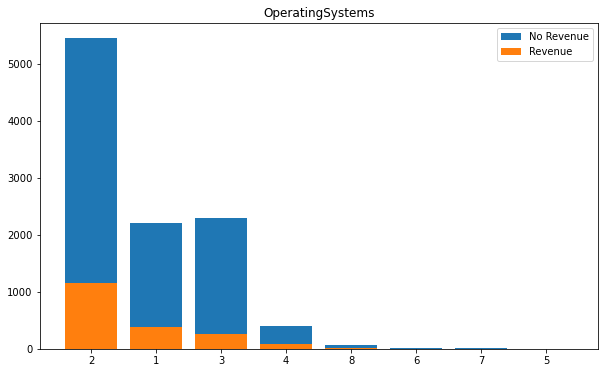

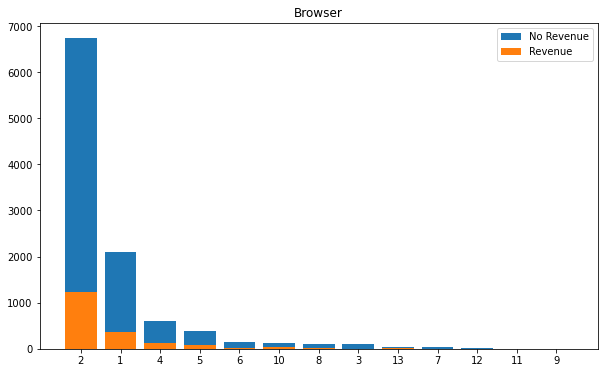

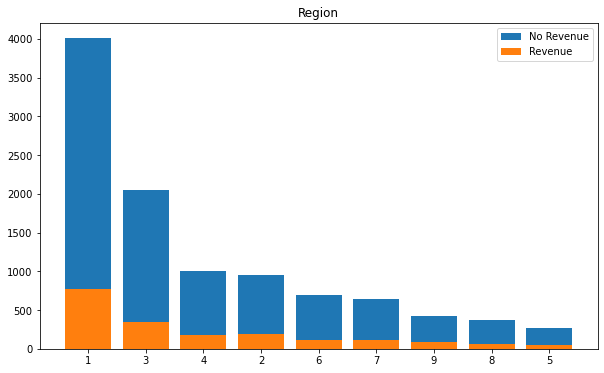

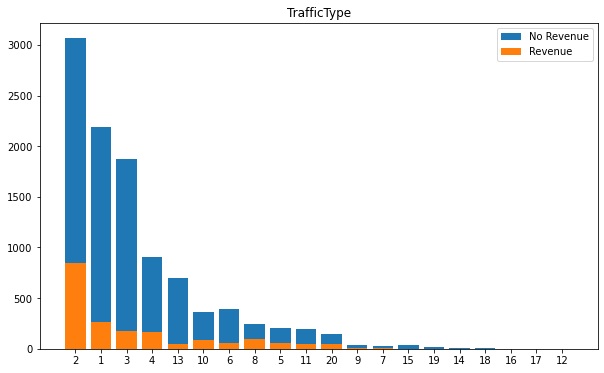

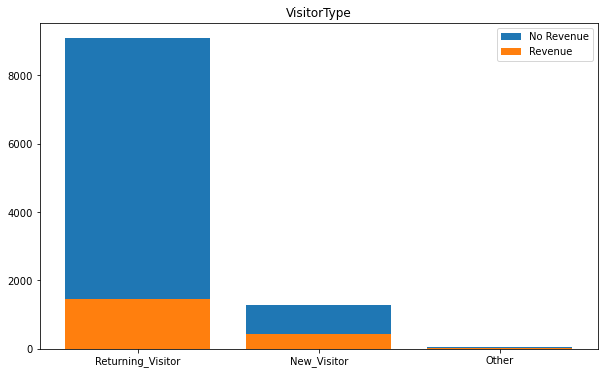

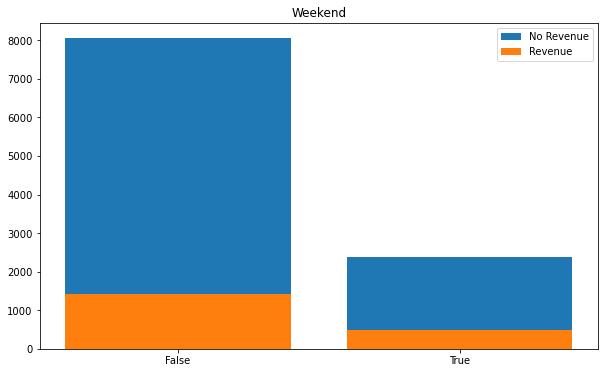

In [74]:
#Plotting countplotbar plots for each categorical variable by revenue and no revenue categories  
for i in cat_cols:
    fig = plt.figure()
    ct = pd.crosstab(df[i],df['Revenue'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    plt.bar(ct.index,ct.iloc[:,0])
    plt.bar(ct.index,ct.iloc[:,1])
    plt.title(i)
    plt.legend(labels=['No Revenue','Revenue'])
    plt.show()

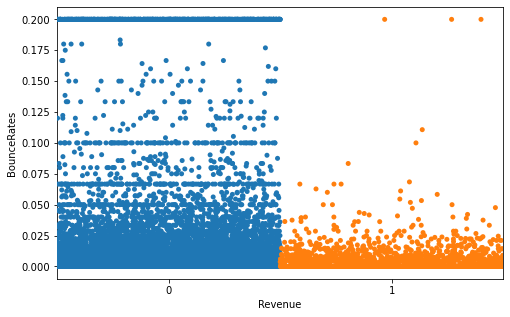

In [21]:
#Jitter plot of BounceRates by Revenue
plt.rcParams['figure.figsize'] = [8, 5]
sns.stripplot(x='Revenue',y='BounceRates',data=df,jitter=0.5);

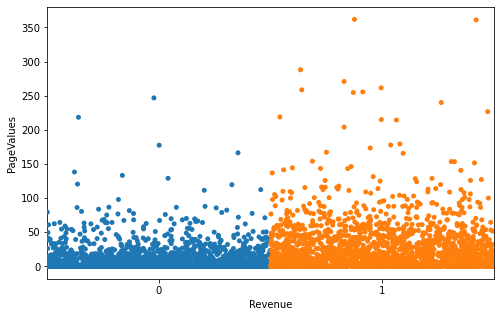

In [22]:
#Jitter plot of PageValues by Revenue
plt.rcParams['figure.figsize'] = [8, 5]
sns.stripplot(x='Revenue',y='PageValues',data=df,jitter=0.5);

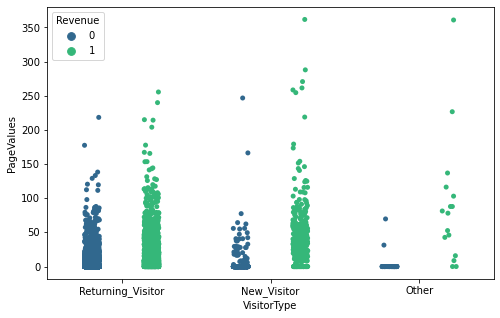

In [23]:
#Jitter plot of PageValues by Revenue and VisitorType
plt.rcParams['figure.figsize'] = [8, 5]
sns.stripplot(x="VisitorType", y="PageValues", hue="Revenue", data=df, palette="viridis", dodge=True);

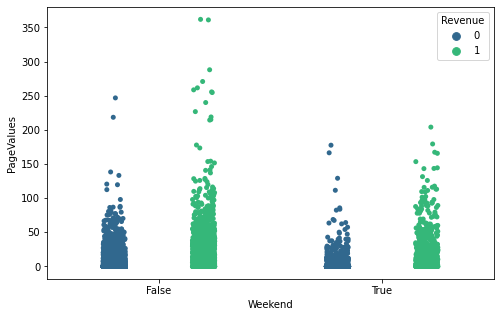

In [24]:
#Jitter plot of PageValues by Revenue and Weekend
plt.rcParams['figure.figsize'] = [8, 5]
sns.stripplot(x="Weekend", y="PageValues", hue="Revenue", data=df, palette="viridis", dodge=True);

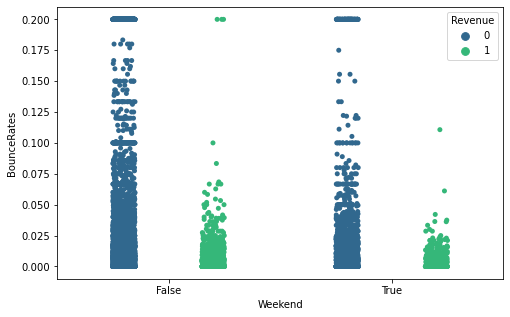

In [25]:
#Jitter plot of BounceRates by Revenue and Weekend
plt.rcParams['figure.figsize'] = [8, 5]
sns.stripplot(x="Weekend", y="BounceRates", hue="Revenue", data=df, palette="viridis", dodge=True);

## 5. Data preprocessing

In [26]:
X = df.drop('Revenue',axis=1) #np array of the feature variables
y = df['Revenue'].astype(int) #np array of the target variables

In [27]:
# Encoding categorical variables to dummy variables
X = pd.get_dummies(X,drop_first=True)

In [28]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,1,1


In [29]:
# Standardizing data to make it normal and avoid differnce in scales ammong coefficients
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

In [30]:
# Train and test set split
from sklearn.model_selection import train_test_split
# Using Stratify split to ensure the classes(revenue and no revenue) are represented equally in test and train.
X_train, X_val, y_train, y_val = train_test_split(X,y,stratify = y,test_size=0.2,random_state=100)

In [31]:
# Checking the shapes of the X and y dataframes
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)

print("X_val shape",X_val.shape)
print("y_val shape",y_val.shape)

X_train shape (9864, 68)
y_train shape (9864,)
X_val shape (2466, 68)
y_val shape (2466,)


## 6. Modeling

In [32]:
#Importing models
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn import tree

#Importing metrics
from sklearn import metrics

#Importing Gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [33]:
# Creating a function for calculation of confusion matrix, sensitivity, specificity and accuracy
# We could use this for all types of models and compare the metric values to assess the model performance.
results = pd.DataFrame()
def model_metrics(model_name, actual = False,pred = False):

    confusion = metrics.confusion_matrix(actual,pred)

    TP = confusion[1,1]  
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall_sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    roc_auc_score = metrics.roc_auc_score(actual,pred)
    
    modeldict = {'Model_Name': model_name, 'Accuracy': accuracy, 'Recall/Sensitivity':recall_sensitivity,
                'Specificity': specificity, 'ROC_AUC_Score': roc_auc_score}
    
    return modeldict

In [34]:
# Handling class imbalance before training the model to avoid model from getting more biased towards one category

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train,y_train = rus.fit_sample(X_train,y_train)

### Logistic regression

In [35]:
# Fitting a logistic regression model

lm_model = LogisticRegression(class_weight='balanced',random_state=586)
lm_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=586)

In [36]:
# Predicting on train set
train_pred = lm_model.predict(X_train)
train_pred_prob = lm_model.predict_proba(X_train)[:,1]

In [37]:
# Dataframe with the actual fraud and the predicted probabilities

pred_y_train_final = pd.DataFrame({'revenue':y_train.values,'probability':train_pred_prob})
#pred_y_train_final.head()

In [38]:
# making the predictions with default cut-off value as 0.5

pred_y_train_final['predicted'] = pred_y_train_final["probability"].map(lambda x: 1 if x > 0.5 else 0)
pred_y_train_final.head()

,revenue,probability,predicted
0,0,0.008388,0
1,0,0.070454,0
2,0,0.963201,1
3,0,0.257696,0
4,0,0.007948,0


In [39]:
# Model metrics for training data 
log_dict = model_metrics('Baseline_Log_Reg_Train',pred_y_train_final["revenue"],pred_y_train_final["predicted"])
results = pd.DataFrame.from_dict(log_dict,orient='index')

In [40]:
results

,0
Model_Name,Baseline_Log_Reg_Train
Accuracy,0.823722
Recall/Sensitivity,0.788336
Specificity,0.859109
ROC_AUC_Score,0.823722


In [41]:
# Finding optimal cutoff probablity

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_y_train_final[i]= pred_y_train_final.probability.map(lambda x: 1 if x > i else 0)

pred_y_train_final.head()

,revenue,probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008388,0,1,0,0,0,0,0,0,0,0,0
1,0,0.070454,0,1,0,0,0,0,0,0,0,0,0
2,0,0.963201,1,1,1,1,1,1,1,1,1,1,1
3,0,0.257696,0,1,1,1,0,0,0,0,0,0,0
4,0,0.007948,0,1,0,0,0,0,0,0,0,0,0


In [42]:
# Calculating accuracy,sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(pred_y_train_final["revenue"],pred_y_train_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0] + cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0] + cm[1,1])
    
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.636959     0.998034     0.275885
0.2          0.2  0.754915     0.980996     0.528834
0.3          0.3  0.808978     0.933159     0.684797
0.4          0.4  0.825360     0.868283     0.782438
0.5          0.5  0.823722     0.788336     0.859109
0.6          0.6  0.810288     0.706422     0.914155
0.7          0.7  0.777851     0.617955     0.937746
0.8          0.8  0.746068     0.530144     0.961992
0.9          0.9  0.693644     0.414155     0.973132


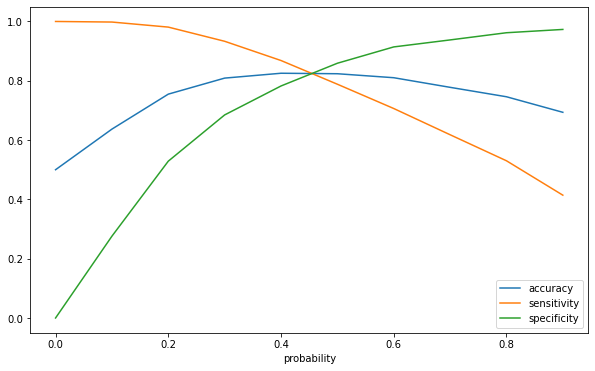

In [43]:
# Plotting accuracy,sensitivity and specificity for various probabilities

plt.rcParams['figure.figsize'] = [10, 6]
cutoff_df.plot.line(x = 'probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### We are choosing a cutoff where we are getting high sensitivity and decent accuracy and specificity, because in this business scenario we are more focussed on sensitivity to avoid losing prospective customers. 
#### We can see that at 0.3 cutoff we have high sensitivity as well as good accuracy. 

In [44]:
# Making prediction on training data using cut off = 0.3

pred_y_train_final['final_predicted'] = pred_y_train_final.probability.map( lambda x: 1 if x > 0.3 else 0)
pred_y_train_final.head()

,revenue,probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.008388,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.070454,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.963201,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.257696,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.007948,0,1,0,0,0,0,0,0,0,0,0,0


In [45]:
log_dict2 = model_metrics('Log_Reg_Train_Low_Thresh',pred_y_train_final["revenue"],
                          pred_y_train_final["final_predicted"])
results[1] = pd.Series(log_dict2).transpose()

In [46]:
results

,0,1
Model_Name,Baseline_Log_Reg_Train,Log_Reg_Train_Low_Thresh
Accuracy,0.823722,0.808978
Recall/Sensitivity,0.788336,0.933159
Specificity,0.859109,0.684797
ROC_AUC_Score,0.823722,0.808978


In [47]:
# Metrics on test data, 0.5 threshold
y_predicted = lm_model.predict(X_val)
probs = lm_model.predict_proba(X_val)[:, 1]

log_dict3 = model_metrics('Baseline_Log_Reg_Test',y_predicted,y_val)
results[2] = pd.Series(log_dict3).transpose()

In [48]:
results

,0,1,2
Model_Name,Baseline_Log_Reg_Train,Log_Reg_Train_Low_Thresh,Baseline_Log_Reg_Test
Accuracy,0.823722,0.808978,0.833333
Recall/Sensitivity,0.788336,0.933159,0.476033
Specificity,0.859109,0.684797,0.94949
ROC_AUC_Score,0.823722,0.808978,0.712761


In [49]:
# Dataframe with the actual revenue tag and the predicted probabilities

pred_y_test_final = pd.DataFrame({'revenue':y_val.values,'probability':probs})
#pred_y_test_final.head()

In [50]:
# New column 'predicted' with 1 if probability > 0.3 else 0
pred_y_test_final['predicted'] = pred_y_test_final.probability.map(lambda x: 1 if x > 0.3 else 0)

pred_y_test_final.head()

,revenue,probability,predicted
0,0,0.548901,1
1,0,0.009113,0
2,0,0.430821,1
3,1,0.684311,1
4,0,0.427165,1


In [51]:
#Metrics on test data, 0.3 threshold
log_dict4 = model_metrics('Log_Reg_Test_Low_Thresh',
                          pred_y_test_final["revenue"],pred_y_test_final["predicted"])
results[3] = pd.Series(log_dict4).transpose()
results

,0,1,2,3
Model_Name,Baseline_Log_Reg_Train,Log_Reg_Train_Low_Thresh,Baseline_Log_Reg_Test,Log_Reg_Test_Low_Thresh
Accuracy,0.823722,0.808978,0.833333,0.709651
Recall/Sensitivity,0.788336,0.933159,0.476033,0.910995
Specificity,0.859109,0.684797,0.94949,0.672745
ROC_AUC_Score,0.823722,0.808978,0.712761,0.79187


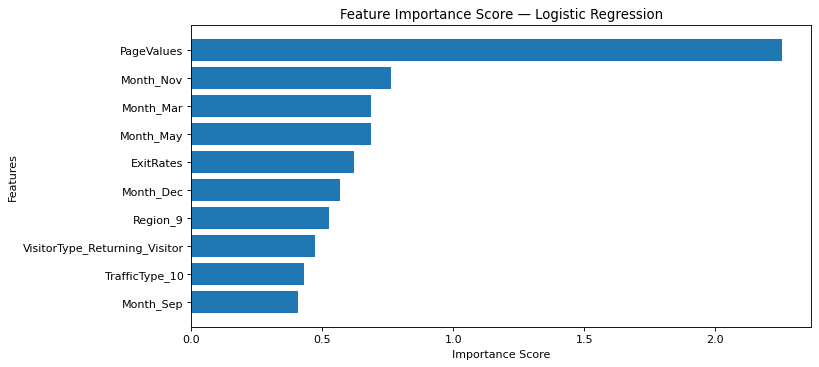

In [73]:
lr_importances = pd.DataFrame(
    abs(lm_model.coef_.reshape(len(X_val.columns),1)),index = X_val.columns,
   columns=['importance']).sort_values('importance',ascending=False)

num = min([50,len(X_val.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = lr_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(lr_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.barh(ylocs[-10:], values_to_plot[-10:], align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score — Logistic Regression')
plt.yticks(ylocs[-10:], feature_labels[-10:])
plt.show()

### Decision Tree

In [53]:
# Fitting decision tree classifier model
dec_tree_1 = DecisionTreeClassifier()
dec_tree_1.fit(X_train, y_train)

# Test dataset
y_predicted = dec_tree_1.predict(X_val)
probs = dec_tree_1.predict_proba(X_val)[:, 1]

#Metrics on baseline decision tree
baseline_dt = model_metrics('Baseline_Decision_Tree',y_val,y_predicted)
results[4] = pd.Series(baseline_dt).transpose()


In [54]:
# Parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

dec_tree_2 = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dec_tree_2, 
                           param_grid = param_grid,cv = 5,verbose = 1,n_jobs=5)

# Fit the grid search to the data

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.9s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [55]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032650,0.001560,0.007288,0.001747,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834697,0.841244,0.840984,0.863934,0.862295,0.848631,0.012067,1
1,0.034491,0.002336,0.004779,0.000935,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834697,0.841244,0.840984,0.863934,0.862295,0.848631,0.012067,1
2,0.030079,0.004216,0.004534,0.000789,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.854337,0.831424,0.832787,0.855738,0.854098,0.845677,0.011104,5
3,0.030605,0.003089,0.005354,0.001195,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.854337,0.831424,0.832787,0.855738,0.854098,0.845677,0.011104,5
4,0.032032,0.003442,0.005467,0.001681,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.831424,0.841244,0.840984,0.862295,0.849180,0.845025,0.010307,13


In [56]:
# Optimal accuracy score and hyperparameters

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8486308389900994
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [57]:
# creating model with optimal hyperparameters

clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50, random_state=100)

In [58]:
#Metrics on baseline decision tree

y_train_pred = clf_gini.predict(X_train)

y_train_pred_proba = clf_gini.predict_proba(X_train)[:, 1]

optimal_dt_train = model_metrics('Optimal_Decision_Tree_Train',y_train,y_train_pred)
results[5] = pd.Series(optimal_dt_train).transpose()

In [59]:
#Metrics on baseline decision tree

y_val_pred = clf_gini.predict(X_val)

y_val_pred_proba = clf_gini.predict_proba(X_val)[:, 1]

optimal_dt_test = model_metrics('Optimal_Decision_Tree_Test',y_val,y_val_pred)
results[6] = pd.Series(optimal_dt_test).transpose()

In [60]:
results

,0,1,2,3,4,5,6
Model_Name,Baseline_Log_Reg_Train,Log_Reg_Train_Low_Thresh,Baseline_Log_Reg_Test,Log_Reg_Test_Low_Thresh,Baseline_Decision_Tree,Optimal_Decision_Tree_Train,Optimal_Decision_Tree_Test
Accuracy,0.823722,0.808978,0.833333,0.709651,0.796026,0.854522,0.847121
Recall/Sensitivity,0.788336,0.933159,0.476033,0.910995,0.782723,0.862385,0.853403
Specificity,0.859109,0.684797,0.94949,0.672745,0.798464,0.846658,0.845969
ROC_AUC_Score,0.823722,0.808978,0.712761,0.79187,0.790594,0.854522,0.849686


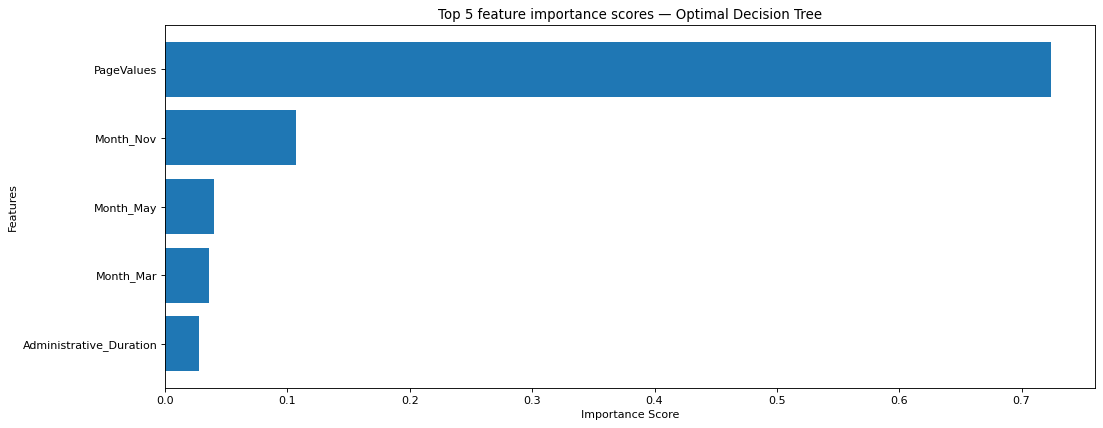

In [61]:
#Plotting importance values of variables used in decision tree
clf_feature_importances = pd.DataFrame(clf_gini.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
num = min([50,len(list(X.columns))])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = clf_feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(clf_feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(ylocs[-5:], values_to_plot[-5:], align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Top 5 feature importance scores — Optimal Decision Tree')
plt.yticks(ylocs[-5:], feature_labels[-5:])
plt.show()

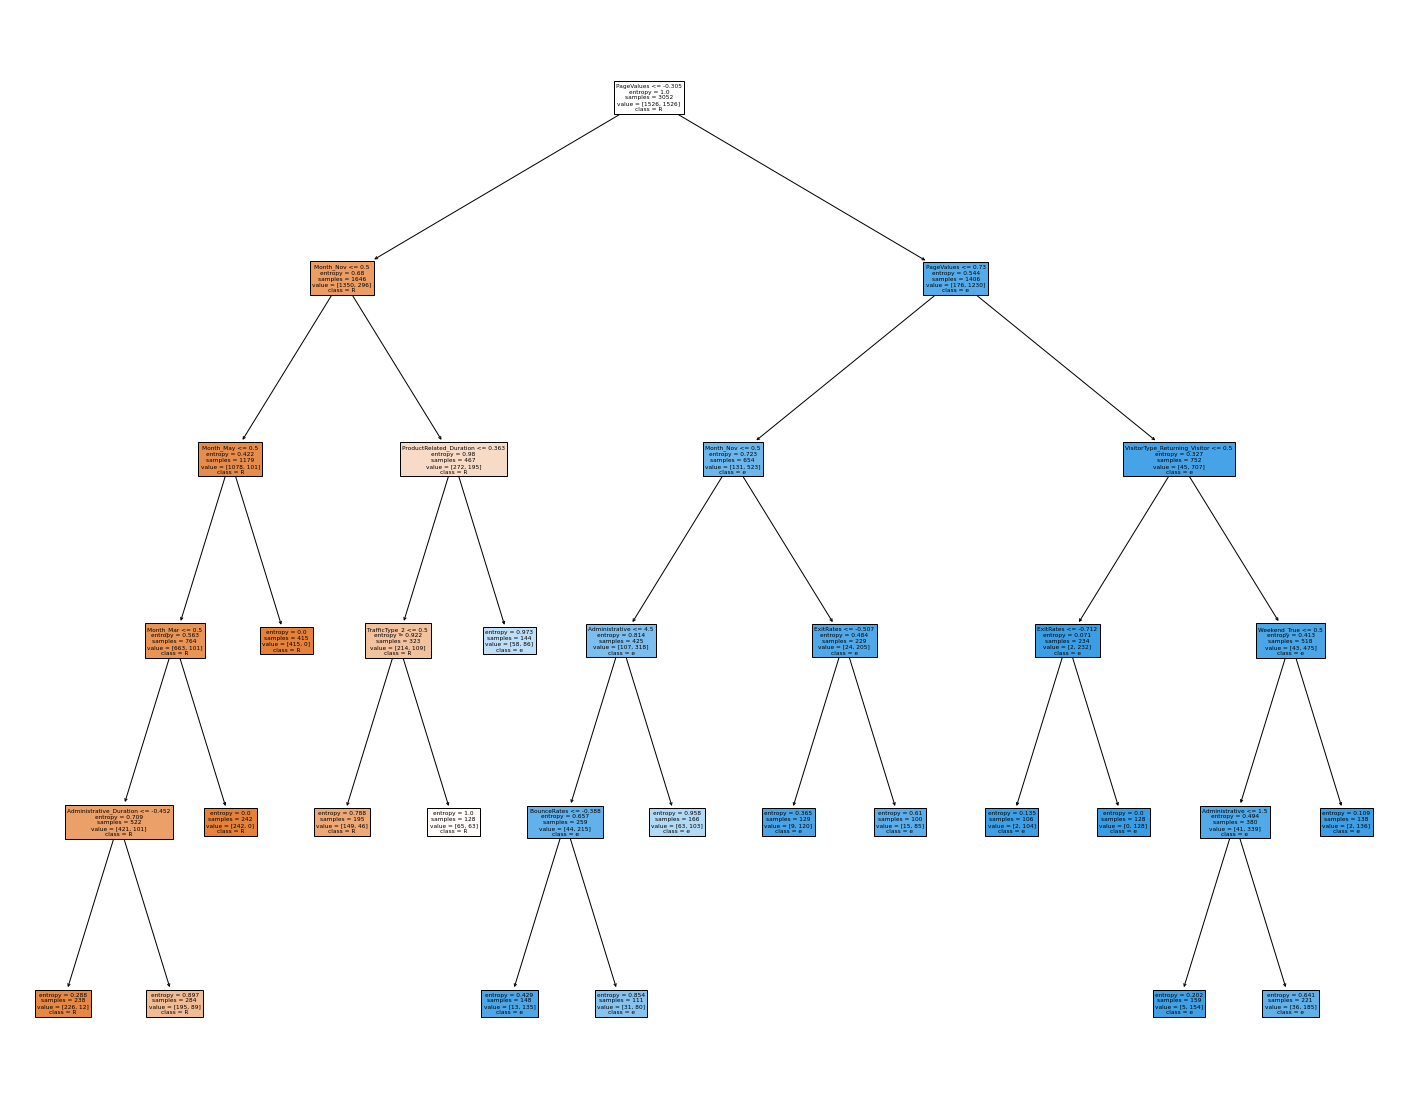

In [62]:
# Generating the decision tree image from the model
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=X_val.columns,  
                   class_names='Revenue',
                   filled=True)

In [63]:
# Saving the decision tree image as a png file
fig.savefig("decistion_tree.png")

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier #ensemble decision tree model
rfc = RandomForestClassifier(random_state=586)
rfc.fit(X_train,y_train)
rfc_ypred = rfc.predict(X_val)

#Metrics for random forest 

rf_metrics = model_metrics('Baseline_Random_Forest',y_val,rfc_ypred)
results[7] = pd.Series(rf_metrics).transpose()

### Gradient boosting

In [65]:
from lightgbm import LGBMClassifier #gradient boosting model
lgbm = LGBMClassifier(random_state=586)
lgbm.fit(X_train,y_train)
lgbm_ypred = lgbm.predict(X_val)


#Metrics for lgbm 

lgbm_metrics = model_metrics('Baseline_LGBM',y_val,lgbm_ypred)
results[8] = pd.Series(lgbm_metrics).transpose()

## 7. Visualizing the results

In [66]:
results = results.rename(columns=results.iloc[0]).drop(results.index[0])

In [67]:
results

,Baseline_Log_Reg_Train,Log_Reg_Train_Low_Thresh,Baseline_Log_Reg_Test,Log_Reg_Test_Low_Thresh,Baseline_Decision_Tree,Optimal_Decision_Tree_Train,Optimal_Decision_Tree_Test,Baseline_Random_Forest,Baseline_LGBM
Accuracy,0.823722,0.808978,0.833333,0.709651,0.796026,0.854522,0.847121,0.848743,0.829278
Recall/Sensitivity,0.788336,0.933159,0.476033,0.910995,0.782723,0.862385,0.853403,0.842932,0.856021
Specificity,0.859109,0.684797,0.94949,0.672745,0.798464,0.846658,0.845969,0.849808,0.824376
ROC_AUC_Score,0.823722,0.808978,0.712761,0.79187,0.790594,0.854522,0.849686,0.84637,0.840199


In [68]:
for i in results.columns.to_list():
    results[i] = results[i].astype('float64')

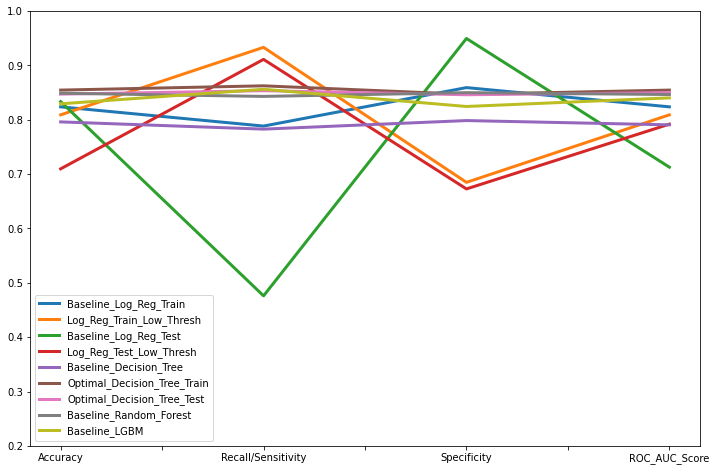

In [69]:
ax = results.plot.line(figsize=(12,8),ylim=(0.2,1),linewidth=3)